In [1]:
import os # file path joining gracefully
import pyart # for radar object and utilities
import matplotlib.pyplot as plt # plot API
import matplotlib as mpl # matplotlib parameters
import numpy as np # math operations
import gzip # to unzip file
import shutil # copies file
# import sys

from tools.funcs import read_casa_netcdf, impute_missing, scale


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/rgooch/anaconda3/envs/radar/lib/python3.7/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/rgooch/anaconda3/envs/radar/lib/python3.7/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
# radar file in current directory
EXAMPLE_PATH = './'
EXAMPLE_FILE = 'midlothian.tx-20170503-174035.netcdf.gz'

In [3]:
nc_file_path = os.path.join(EXAMPLE_PATH, EXAMPLE_FILE)

# shows how to open netcdf from gzipped file
with gzip.open(nc_file_path, 'rb') as zipped_nc_file:
    with open('temp.nc', 'wb') as nc_file:
        shutil.copyfileobj(zipped_nc_file, nc_file)

In [4]:
mpl.rcParams["font.size"] = 24

In [5]:
radar = read_casa_netcdf('temp.nc')

In [6]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (750,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (750,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	Reflectivity:
		data: <ndarray of type: float32 and shape: (750, 675)>
		Units: dBz
	Velocity:
		data: <ndarray of type: float32 and shape: (750, 675)>
		Units: MetersPerSecond
	SpectralWidth:
		data: <ndarray of type: float32 and shape: (750, 675)>
		Units: MetersPerSecond
	DifferentialReflectivity:
		data

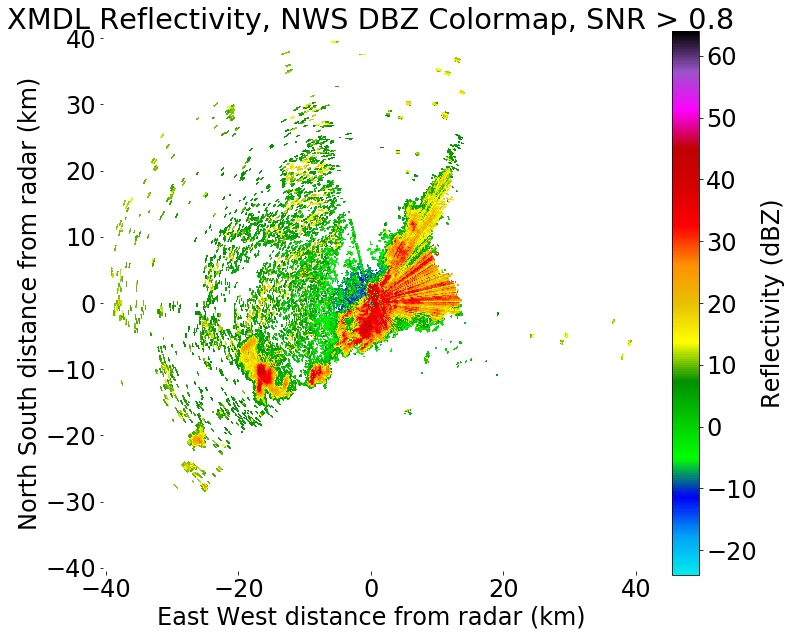

In [7]:
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, frameon = False)

display = pyart.graph.RadarDisplay(radar)

display.plot(
    'CorrectedReflectivity', 
    0, 
    vmin = -24, 
    vmax = 64, 
    cmap = pyart.graph.cm.NWSRef,
    mask_tuple = ['SignalToNoiseRatio',0.8],
#     mask_tuple = ['CrossPolCorrelation',0.75],
    colorbar_label = 'Reflectivity (dBZ)',
    title = 'XMDL Reflectivity, NWS DBZ Colormap, SNR > 0.8'
)
ax.set_aspect('equal')

plt.savefig('zh-midlothian.tx-20170503-174035.png')

plt.show()

In [10]:
from netCDF4 import Dataset

In [12]:
radar2 = Dataset('temp.nc')

In [18]:
for itm in radar2.variables.keys():
    print(itm)

Azimuth
Elevation
Start_Azimuth
Start_Elevation
Stop_Azimuth
Stop_Elevation
GateWidth
StartRange
Time
AfcFrequency
TxFrequency
TxLength
TxPower
RxHGain
RadarConstant
ProcState
GcfState
OesState
Reflectivity
Velocity
SpectralWidth
DifferentialReflectivity
DifferentialPhase
CrossPolCorrelation
NormalizedCoherentPower
SpecificPhase
CorrectedReflectivity
CorrectedDifferentialReflectivity
SignalToNoiseRatio
RainfallRate
HVReflectivity


In [23]:
radar2.variables['RxHGain'][6]

masked_array(data=-110.36027995,
             mask=False,
       fill_value=1e+20)

In [25]:
radar2.variables['TxFrequency'][6]

masked_array(data=9.38275173e+09,
             mask=False,
       fill_value=1e+20)

## NEXRAD stuff

In [29]:
radar3 = pyart.io.read('KFWS20180601_221859_V06')

In [31]:
[print(names) for names in radar3.fields.keys()]

spectrum_width
cross_correlation_ratio
velocity
differential_reflectivity
reflectivity
differential_phase


[None, None, None, None, None, None]

In [32]:
display3 = pyart.graph.RadarDisplay(radar3)

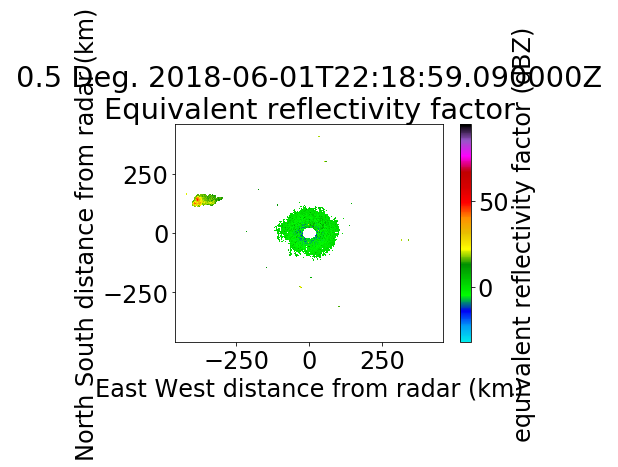

In [34]:
display3.plot_ppi(
    'reflectivity'
)